In [1]:
import numpy

In [2]:
def NN(m1, m2, w1, w2, b):
    z = m1*w1+m2*w2+b
    return sigmoid(z)

def sigmoid(x):
    return 1/(1+numpy.exp(-x))

In [3]:
w1 = numpy.random.randn()
w2 = numpy.random.randn()
b = numpy.random.randn()
NN(3,1.5,w1,w2,b)

In [55]:
p = ['看起來像','我猜是','我想是','可能是']
data =  [[3,1.5,1],[2,1,0],[3,1,0],[3.5,5,1],[5,5,1]]
rand_data = data[numpy.random.randint(len(data))]
m1 = rand_data[0]
m2 =rand_data[1]
prediction = NN(m1,m2,w1,w2,b)
prediction_text = ['藍色','紅色'][int(numpy.round(prediction))]
phrase = numpy.random.choice(p) + "" + prediction_text
o = ('這個' + phrase + "," + "真的是" + ['藍色','紅色'][rand_data[2]])
o

'這個看起來像紅色,真的是紅色'

In [ ]:
#透過NN網路的範例，建立一個猜你想吃什麼的機器人

In [72]:
import numpy as np

In [73]:
X=np.array([[3,1.5],[2,1],[4,1.5],[3,1],[3.5,5],[2,0.5],[5.5,1],[1,1]])
y=np.array([[1],[1],[0],[0],[1],[0],[1],[0]])

In [74]:
def derivatives_sigmoid(x):
    return x * (1-x)

In [82]:
epoch = 50000
lr = 0.1
inputlayer_neurons = X.shape[1]
hiddenlayer_neurons = 20
output_neurons = 1

#weight and bias
wh = np.random.uniform(size=(inputlayer_neurons,hiddenlayer_neurons))
bh = np.random.uniform(size=(1,hiddenlayer_neurons))
wout = np.random.uniform(size=(hiddenlayer_neurons,output_neurons))
bout = np.random.uniform(size=(1,output_neurons))

for i in range(epoch):
    #Forward Propogation
    hidden_layer_input1 = np.dot(X,wh)
    hidden_layer_input = hidden_layer_input1 + bh
    hiddenlayer_activations = sigmoid(hidden_layer_input)
    output_layer_input1 = np.dot(hiddenlayer_activations, wout)
    output_layer_input = output_layer_input1 + bout
    output = sigmoid(output_layer_input)
    #Backpropagation
    
    E = y-output
    back_output_layer = derivatives_sigmoid(output)
    back_hidden_layer = derivatives_sigmoid(hiddenlayer_activations)
    d_output = E * back_output_layer
    Error_at_hidden_layer =d_output.dot(wout.T)
    d_hiddenlayer = Error_at_hidden_layer * back_hidden_layer
    wout += hiddenlayer_activations.T.dot(d_output) * lr
    bout += np.sum(d_output, axis=0, keepdims=True) *lr
    wh += X.T.dot(d_hiddenlayer) *lr
    bh += np.sum(d_hiddenlayer, axis=0, keepdims=True) *lr

print('正確的',y,'\n')
print('預測的',output)

正確的 [[1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]] 

預測的 [[0.98131591]
 [0.95613719]
 [0.03060005]
 [0.03143731]
 [0.99773595]
 [0.01766895]
 [0.97155413]
 [0.02888868]]


In [84]:
import torch
import numpy as np

In [85]:
arr = [[1,2],[3,4]]
print(arr)

[[1, 2], [3, 4]]


In [86]:
np.array(arr)

array([[1, 2],
       [3, 4]])

In [87]:
torch.tensor(arr)

tensor([[1, 2],
        [3, 4]])

In [88]:
np.ones((2,2))

array([[1., 1.],
       [1., 1.]])

In [90]:
np.random.seed(0)
np.random.rand(2,2)

array([[0.5488135 , 0.71518937],
       [0.60276338, 0.54488318]])

In [91]:
torch.manual_seed(0)
torch.rand(2,2)

tensor([[0.4963, 0.7682],
        [0.0885, 0.1320]])

In [93]:
np_array = np.ones((2,2))
torch_tensor = torch.from_numpy(np_array)
print(torch_tensor)

tensor([[1., 1.],
        [1., 1.]], dtype=torch.float64)


In [94]:
type(torch_tensor)

torch.Tensor

In [97]:
np_array_new = np.ones((2,2), dtype=np.int64)
torch.from_numpy(np_array_new)

tensor([[1, 1],
        [1, 1]])

In [98]:
torch_tensor = torch.ones(2,2)
print(torch_tensor)

tensor([[1., 1.],
        [1., 1.]])


In [99]:
torch_to_numpy = torch_tensor.numpy()
print(torch_to_numpy)

[[1. 1.]
 [1. 1.]]


In [100]:
torch_cpu = torch.ones(2,2)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
torch_cpu.to(device)

tensor([[1., 1.],
        [1., 1.]])

In [101]:
torch_cpu.cpu()

tensor([[1., 1.],
        [1., 1.]])

In [105]:
x = torch.ones(2,2)
print(x.size())
x

torch.Size([2, 2])


tensor([[1., 1.],
        [1., 1.]])

In [106]:
x.view(4).size()

torch.Size([4])

In [108]:
c =x + x;c

tensor([[2., 2.],
        [2., 2.]])

In [109]:
torch.add(x,x)

tensor([[2., 2.],
        [2., 2.]])

In [117]:
a = torch.Tensor([[1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]])
a.size()

torch.Size([2, 10])

In [122]:
a.mean()

tensor(5.5000)

In [123]:
a = torch.ones((2,2), requires_grad=True)
a

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)

In [124]:
a.requires_grad

True

In [127]:
x = torch.ones(2, requires_grad=True)
y = 5*(x+1) **2
y

tensor([20., 20.], grad_fn=<MulBackward>)

In [128]:
o = (1/2) * torch.sum(y)
o

tensor(20., grad_fn=<MulBackward>)

In [129]:
o.backward()
x.grad

tensor([10., 10.])

In [131]:
print(x.requires_grad)
print(y.requires_grad)
print(o.requires_grad)

True
True
True


In [144]:
import torch
from torch.optim import SGD
from torch.autograd import Variable, profiler
import numpy as np
import torch.functional as F
import torch.nn.functional as F

In [151]:
corpus = [
    'he is a king',
    'she is a queen',
    'he is a man',
    'she is a woman',
]
corpus

['he is a king', 'she is a queen', 'he is a man', 'she is a woman']

In [152]:
words=[]
for sentence in corpus:
    for word in sentence.split():
        if word not in words:
            words.append(word)
word2idx = {w:idx for (idx,w) in enumerate(words)}
idx2word = {idx:w for (idx,w) in enumerate(words)}
vocabulary_size = len(word2idx)

In [153]:
def get_word_embedding(word):
    word_vec_one_hot = np.zeros(vocabulary_size)
    word_vec_one_hot[word2idx[word]] = 1
    return word_vec_one_hot

In [154]:
window_size = 2
embedding_dims = 10

In [155]:
def train_generator():
    for sentence in corpus:
        words = sentence.split()
        indices = [word2idx[w] for w in words]
        for i in range(len(indices)):
            #Skip-gram
            for w in range(-window_size, window_size +1):
                context_idx = i + w
                if context_idx < 0 or context_idx >= len(indices) or i == context_idx:
                    continue
                center_vec_one_hot = np.zeros(vocabulary_size)
                center_vec_one_hot[indices[i]] = 1
                context_idx = indices[context_idx]
                yield center_vec_one_hot, context_idx

In [156]:
W1 = Variable(torch.randn(embedding_dims, vocabulary_size).float(), requires_grad=True)
W2 = Variable(torch.randn(vocabulary_size, embedding_dims).float(), requires_grad=True)

In [159]:
for epo in range(2000):
    avg_loss = 0
    samples = 0
    for data, target in train_generator():
        x = Variable(torch.from_numpy(data)).float()
        y_true = Variable(torch.from_numpy(np.array([target])).long())
        samples += len(y_true)
        a1 =torch.matmul(W1,x)
        a2 =torch.matmul(W2,a1)
        log_softmax = F.log_softmax(a2, dim=0)
        network_pred_dist = F.softmax(log_softmax, dim=0)
        loss = F.nll_loss(log_softmax.view(1,-1), y_true)
        avg_loss += loss.item()
        loss.backward()
        W1.data -= 0.01*W1.grad.data
        W2.data -= 0.01*W2.grad.data
        W1.grad.data.zero_()
        W2.grad.data.zero_()
    if epo % 50 == 0:
        print(avg_loss/samples)

1.3985165178775787
1.3981377214193345
1.3977741241455077
1.3974249899387359
1.397089284658432
1.3967665523290633
1.3964557558298112
1.396156433224678
1.3958679020404816
1.3955895572900772
1.395320862531662
1.3950612872838974
1.3948104560375214
1.3945678234100343
1.3943328499794005
1.3941054046154022
1.3938848614692687
1.3936711460351945
1.3934635639190673
1.3932621628046036
1.3930665850639343
1.3928764700889587
1.3926915854215622
1.392511823773384
1.392336794734001
1.3921662628650666
1.3920001834630966
1.3918383538722991
1.3916806727647781
1.3915267556905746
1.3913765341043471
1.391229936480522
1.3910868287086486
1.3909469723701477
1.3908103674650192
1.3906768620014192
1.3905463248491288
1.3904186755418777
1.3902937918901443
1.3901715219020843


In [161]:
from scikitplot.decomposition import plot_pca_2d_projection
from sklearn.decomposition import PCA

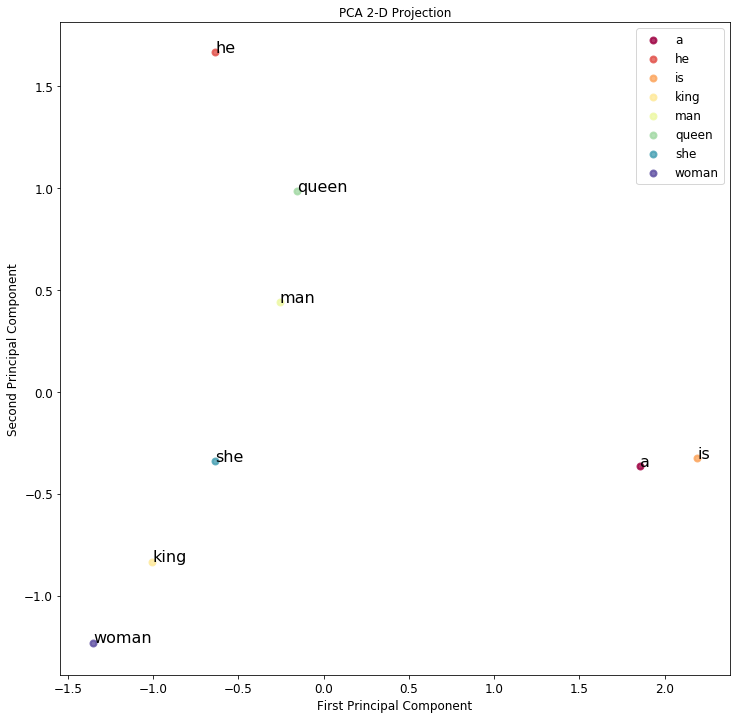

In [165]:
pca = PCA(n_components = 2 )
pca.fit(W1.data.numpy().T)
proj = pca.transform(W1.data.numpy().T)
ax = plot_pca_2d_projection(pca, W1.data.numpy().T, np.array(words), feature_labels=words,figsize=(12,12), text_fontsize=12)
for i, txt in enumerate(words):
    ax.annotate(txt, (proj[i,0], proj[i,1]), size=16)